X shape: (2000, 1000)
X_pca shape: (2000, 100)
Explained variance: 0.8376790388430554
Logistic accuracy on training data: 1.0


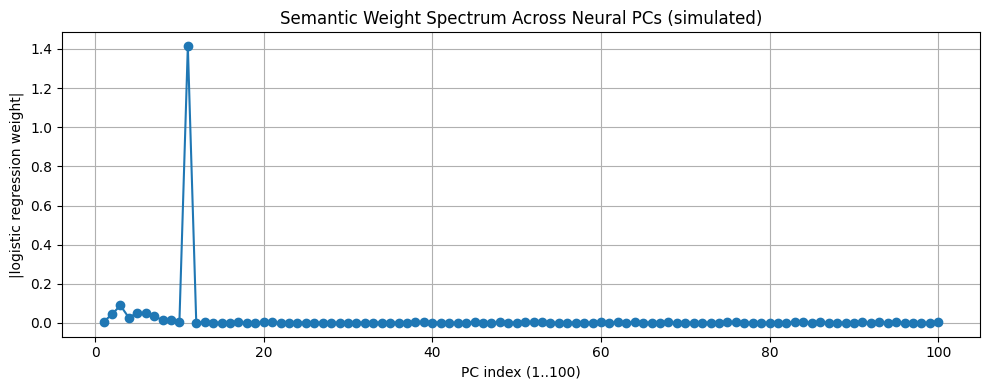


Top 10 semantic PCs in simulation:
PC  11  |w|=1.414
PC   3  |w|=0.089
PC   5  |w|=0.051
PC   6  |w|=0.049
PC   2  |w|=0.044
PC   7  |w|=0.036
PC   4  |w|=0.027
PC   8  |w|=0.013
PC   9  |w|=0.013
PC   1  |w|=0.005


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

rng = np.random.default_rng(0)

# ---------------------------
# 1. Hyperparameters
# ---------------------------
N = 2000        # number of stimuli (images)
D = 1000        # number of "neurons"
K = 10          # number of nuisance latent factors
pca_dim = 100   # how many PCs to keep

semantic_strength = 0.7   # how strongly latent s influences neurons
nuisance_strength = 1.0   # strength of nuisance factors
noise_sigma = 0.5         # neural noise std

# ---------------------------
# 2. Latent variables
# ---------------------------
# class labels: 0 = inanimate, 1 = animal
y = rng.integers(0, 2, size=N)
s = 2*y - 1      # map {0,1} -> {-1,+1}

# nuisance factors: each image has its own vector u in R^K
U = rng.normal(0.0, 1.0, size=(N, K))

# build latent vector z = [s, u_1,...,u_K]
# scale semantic vs nuisance strengths
Z = np.concatenate([
    (semantic_strength * s[:, None]),             # shape (N,1)
    (nuisance_strength * U)                       # shape (N,K)
], axis=1)    # shape (N, K+1)

# ---------------------------
# 3. Mixed-selective neural encoding
# ---------------------------
# random mixing matrix W: each neuron mixes all latent factors
W = rng.normal(0.0, 1.0 / np.sqrt(K+1), size=(D, K+1))   # (D, K+1)

# neural responses: X = Z W^T + noise   (N x D)
X = Z @ W.T + rng.normal(0.0, noise_sigma, size=(N, D))

print("X shape:", X.shape)

# ---------------------------
# 4. PCA on neural activity
# ---------------------------
pca = PCA(n_components=pca_dim, svd_solver="randomized")
X_pca = pca.fit_transform(X)
print("X_pca shape:", X_pca.shape)
print("Explained variance:", pca.explained_variance_ratio_.sum())

# ---------------------------
# 5. Logistic regression on PCs
# ---------------------------
clf = LogisticRegression(
    penalty="l2", C=1.0, solver="liblinear", max_iter=500
)
clf.fit(X_pca, y)

weights = clf.coef_[0]           # shape (pca_dim,)
abs_w = np.abs(weights)

print("Logistic accuracy on training data:",
      clf.score(X_pca, y))

# ---------------------------
# 6. Plot semantic weight spectrum across PCs
# ---------------------------
plt.figure(figsize=(10, 4))
plt.plot(range(1, pca_dim+1), abs_w, marker='o')
plt.xlabel("PC index (1..{})".format(pca_dim))
plt.ylabel("|logistic regression weight|")
plt.title("Semantic Weight Spectrum Across Neural PCs (simulated)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Show top semantic PCs
# ---------------------------
sorted_idx = np.argsort(abs_w)[::-1]
print("\nTop 10 semantic PCs in simulation:")
for i in range(10):
    k = sorted_idx[i]
    print(f"PC {k+1:3d}  |w|={abs_w[k]:.3f}")


X shape: (2000, 5000)
Explained variance: 0.8143663179784039
Logistic accuracy: 0.996


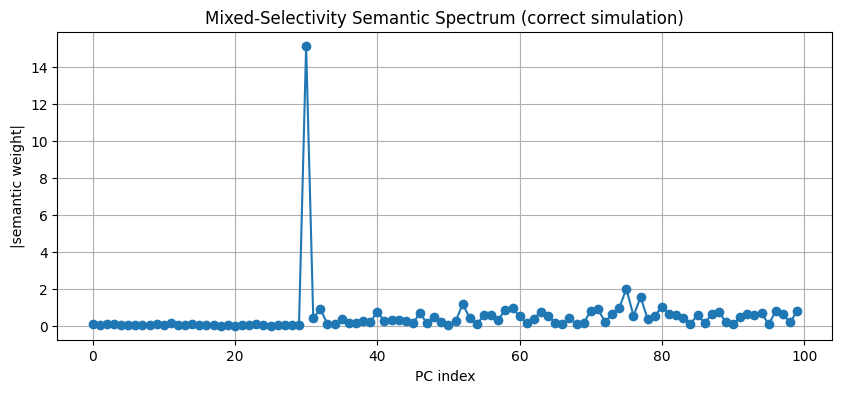


Top semantic PCs:
PC  31 | w=15.154
PC  76 | w=2.005
PC  78 | w=1.550
PC  53 | w=1.167
PC  81 | w=1.033
PC  75 | w=0.969
PC  60 | w=0.966
PC  33 | w=0.898
PC  72 | w=0.897
PC  59 | w=0.871


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

rng = np.random.default_rng(1)

# ---------------------------
# 1. Hyperparameters
# ---------------------------
N = 2000     # images
D = 5000     # neurons (large!)
K = 30       # nuisance latent factors
pca_dim = 100

semantic_strength = 0.1      # WEAK semantic signal
nuisance_strength = 1.0      # STRONG nuisance variation
noise_sigma = 0.5            # realistic neural noise

# ---------------------------
# 2. Latent variables
# ---------------------------
y = rng.integers(0, 2, size=N)
s = 2*y - 1     # semantic +/-1

U = rng.normal(0.0, 1.0, size=(N, K))   # nuisance

Z = np.concatenate([
    (semantic_strength * s[:, None]),
    (nuisance_strength * U)
], axis=1)

# ---------------------------
# 3. Mixed-selective neural encoding
# ---------------------------
W = rng.normal(0.0, 1.0/np.sqrt(K+1), size=(D, K+1))

X = Z @ W.T + rng.normal(0.0, noise_sigma, size=(N, D))
print("X shape:", X.shape)

# ---------------------------
# 4. PCA
# ---------------------------
pca = PCA(n_components=pca_dim, svd_solver="randomized")
X_pca = pca.fit_transform(X)

print("Explained variance:", pca.explained_variance_ratio_.sum())

# ---------------------------
# 5. Logistic regression
# ---------------------------
clf = LogisticRegression(
    penalty="l2", C=10.0, solver="liblinear", max_iter=1000
)
clf.fit(X_pca, y)

weights = clf.coef_[0]
abs_w = np.abs(weights)

print("Logistic accuracy:", clf.score(X_pca, y))

# ---------------------------
# 6. Plot weight spectrum
# ---------------------------
plt.figure(figsize=(10, 4))
plt.plot(abs_w, marker='o')
plt.xlabel("PC index")
plt.ylabel("|semantic weight|")
plt.title("Mixed-Selectivity Semantic Spectrum (correct simulation)")
plt.grid(True)
plt.show()

# Show strongest PCs
sorted_idx = np.argsort(abs_w)[::-1]
print("\nTop semantic PCs:")
for i in range(10):
    k = sorted_idx[i]
    print(f"PC {k+1:3d} | w={abs_w[k]:.3f}")
